<h1 align="center"> 
  CMSC320 Final Project
</h1>
<h1 align="center"> 
  Univeristy of Maryland Computer Science Course Grade Predictor 
</h1>

<h2 align="center"> Team: Siddhesh Gupta, Tanmay Prakash, Shanil Kothari </h2>

<h2> Introduction </h2>
<p> 
Intro here
</p>

<h2> Data Collection </h2>

A student's acadmic records are goverened by many privacy laws, including FERPA. FERPA is a Federal law that protects a student's education records. It may only disclose a student's educational record if he or she has given written consent to do so. We requested for anonymized data from the school, but due to these laws we couldn't get access to such data. We had to do it the harder way - survey people for their data. Then we made a google form to collect grades for each course they took. We made it anonymous so that no personal information is collected and can be linked to a specific student. We relied on the honesty of students to fill out the form. 
 
Important things about the data -
1. We generally saw a trend that students who performed well in classes shared their data. For most of the classes the average grade from the survey was heigher than the overall general average grade. (Tanmay insert teh graph and explain the results)
2. Student's are allowed to skip certain classes through the help of AP's, high school credits, and Computer Science Exemption exams. We encountered such data and we had no way to determine which grade to assign the student. We made a general assumption to take these as B+ grades, which according to university policy means Good Mastery of the subject. This was done for the following courses - CMSC 131, CMSC 132, CMSC 216, CMSC 250, MATH 140, and MATH 141. 
3. There were cases where students didn't want to share the results/grades on a particular course. To deal with this, we averaged the grades in other courses that the student took and entered that value instead of "Don't want to share".
4. There were some students who didn't attempt certain courses. We ignored such student enteries entirely for certain models depending on the subject.
5. There were certain edge cases also, which we handled on case to case basis.
</p>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,5)
import warnings
warnings.filterwarnings("ignore")

### Initial Data Cleaning
We perform basic cleaning on the survey data so that we can visualize and perform exploratory data analysis.

In [7]:
df = pd.read_csv("data.csv")

In [8]:
for i, row in df.iterrows():
    txt = "User{0}"
    df['Timestamp'][i] = txt.format(i) 

df.columns=["Users", "CMSC131", "CMSC132", "CMSC216", "CMSC250", "CMSC330", "CMSC351", "MATH140", "MATH141", "MATH240", "MATH241", 
              "STAT400", "CS_Track", "CMSC4XX", "CMSC411", "CMSC412", "CMSC414", "CMSC416", "CMSC417", "CMSC420", "CMSC421",
              "CMSC422", "CMSC423", "CMSC424", "CMSC426", "CMSC427", "CMSC470", "CMSC430", "CMSC433", "CMSC434", "CMSC435", "CMSC436", 
              "CMSC451", "CMSC452", "CMSC454", "CMSC456", "CMSC457", "CMSC460", "CMSC466", "CMSC320", "CMSC425", "CMSC472", 
              "CMSC473", "CMSC474", "CMSC475", "Graduated"]

In [9]:
df.head()

,Users,CMSC131,CMSC132,CMSC216,CMSC250,CMSC330,CMSC351,MATH140,MATH141,MATH240,...,CMSC457,CMSC460,CMSC466,CMSC320,CMSC425,CMSC472,CMSC473,CMSC474,CMSC475,Graduated
0,User0,A,A,A,A,A,B-,A,A,A,...,NaN,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,Not Completed
1,User1,A,A-,A-,A,A,A+,A,A,Not Attempted,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,User2,B,B-,B,C+,A,A,A,A,A,...,Not Attempted,Not Attempted,NaN,B-,NaN,NaN,NaN,NaN,NaN,Not Completed
3,User3,A,B+,B-,B,B+,C-,Not Attempted,Not Attempted,B,...,Not Attempted,Not Attempted,Not Attempted,Don't want to share,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Completed
4,User4,A,A,A-,A,A-,A+,A,A+,A-,...,Not Attempted,Not Attempted,Not Attempted,A,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Completed


## Exploratory Data Analysis

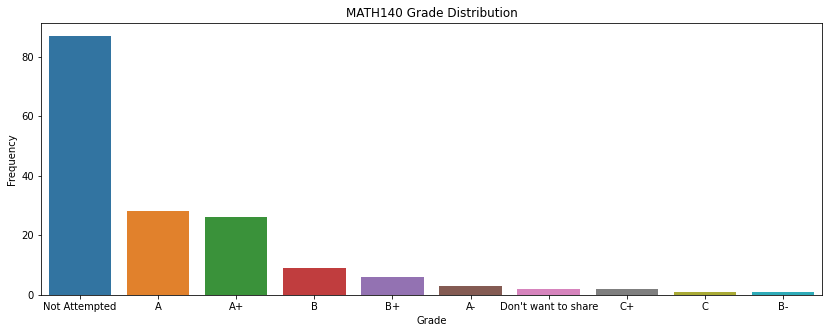

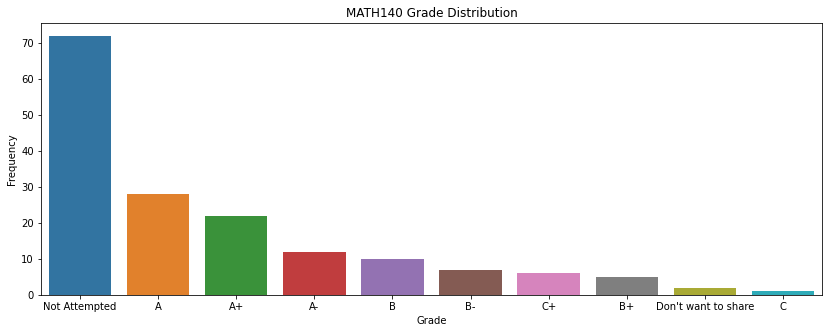

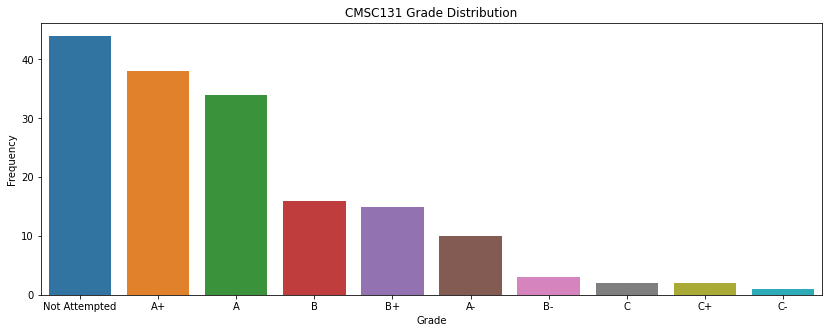

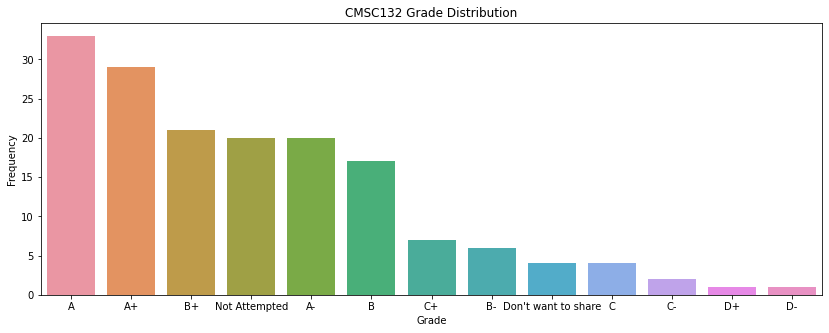

In [18]:
MATH140 = df['MATH140'].value_counts()
sns.barplot(MATH140.index, MATH140.values)
plt.title("MATH140 Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()
MATH141 = df['MATH141'].value_counts()
sns.barplot(MATH141.index, MATH141.values)
plt.title("MATH140 Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()
CMSC131 = df['CMSC131'].value_counts()
sns.barplot(CMSC131.index, CMSC131.values)
plt.title("CMSC131 Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()
CMSC132 = df['CMSC132'].value_counts()
sns.barplot(CMSC132.index, CMSC132.values)
plt.title("CMSC132 Grade Distribution")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

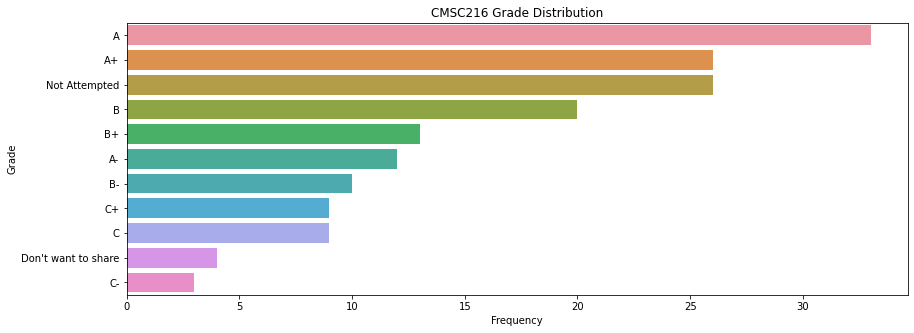

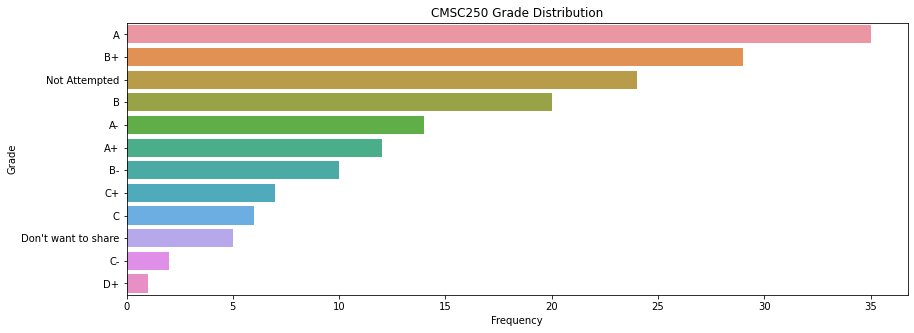

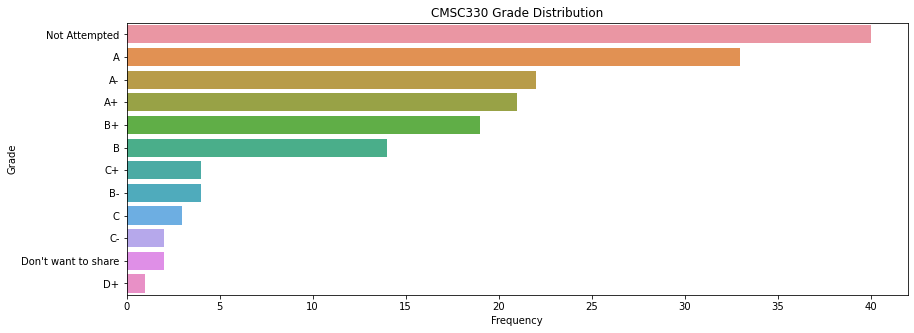

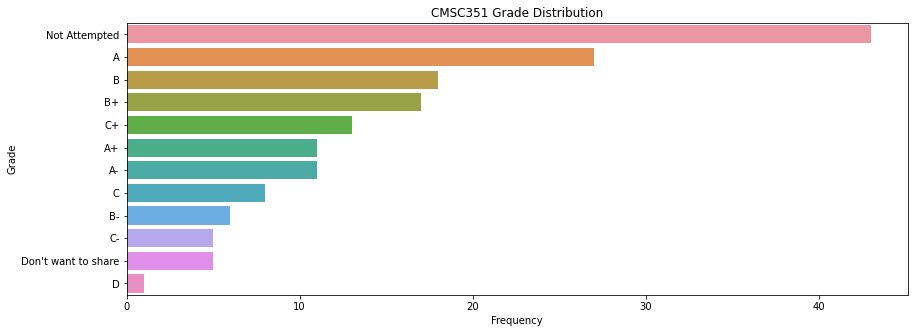

In [19]:
# CMSC216
CMSC216 = df['CMSC216'].value_counts()
sns.barplot(CMSC216.values, CMSC216.index)
plt.title("CMSC216 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()
# CMSC250
CMSC250 = df['CMSC250'].value_counts()
sns.barplot(CMSC250.values, CMSC250.index)
plt.title("CMSC250 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()
# CMSC330
CMSC330 = df['CMSC330'].value_counts()
sns.barplot(CMSC330.values, CMSC330.index)
plt.title("CMSC330 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()
# CMSC351
CMSC351 = df['CMSC351'].value_counts()
sns.barplot(CMSC351.values, CMSC351.index)
plt.title("CMSC351 Grade Distribution")
plt.xlabel("Frequency")
plt.ylabel("Grade")
plt.show()

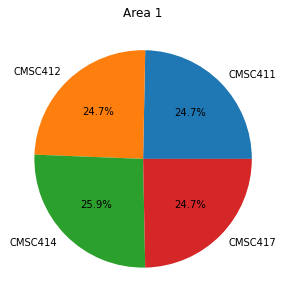

In [20]:
# AREA 1
NaNs_411 = df['CMSC411'].isna().sum()
NaNs_412 = df['CMSC412'].isna().sum()
NaNs_414 = df['CMSC414'].isna().sum()
NaNs_417 = df['CMSC417'].isna().sum()
CMSC411_num = 165 - NaNs_411
CMSC412_num = 165 - NaNs_412
CMSC414_num = 165 - NaNs_414
CMSC417_num = 165 - NaNs_417
data = [CMSC411_num, CMSC412_num, CMSC414_num, CMSC417_num]
labels = 'CMSC411', 'CMSC412', 'CMSC414', 'CMSC417'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 1")
plt.show()

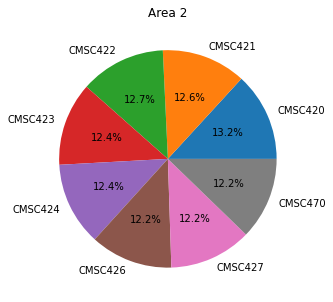

In [21]:
# AREA 2
NaNs_420 = df['CMSC420'].isna().sum()
NaNs_421 = df['CMSC421'].isna().sum()
NaNs_422 = df['CMSC422'].isna().sum()
NaNs_423 = df['CMSC423'].isna().sum()
NaNs_424 = df['CMSC424'].isna().sum()
NaNs_426 = df['CMSC426'].isna().sum()
NaNs_427 = df['CMSC427'].isna().sum()
NaNs_470 = df['CMSC470'].isna().sum()
CMSC420_num = 165 - NaNs_420
CMSC421_num = 165 - NaNs_421
CMSC422_num = 165 - NaNs_422
CMSC423_num = 165 - NaNs_423
CMSC424_num = 165 - NaNs_424
CMSC426_num = 165 - NaNs_426
CMSC427_num = 165 - NaNs_427
CMSC470_num = 165 - NaNs_470
data = [CMSC420_num, CMSC421_num, CMSC422_num, CMSC423_num, CMSC424_num, CMSC426_num, CMSC427_num, CMSC470_num]
labels = 'CMSC420', 'CMSC421', 'CMSC422', 'CMSC423', 'CMSC424', 'CMSC426', 'CMSC427', 'CMSC470'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 2")
plt.show()

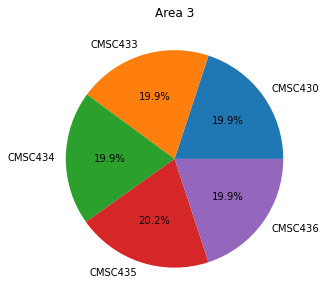

In [22]:
# AREA 3
NaNs_430 = df['CMSC430'].isna().sum()
NaNs_433 = df['CMSC433'].isna().sum()
NaNs_434 = df['CMSC434'].isna().sum()
NaNs_435 = df['CMSC435'].isna().sum()
NaNs_436 = df['CMSC436'].isna().sum()
CMSC430_num = 165 - NaNs_430
CMSC433_num = 165 - NaNs_433
CMSC434_num = 165 - NaNs_434
CMSC435_num = 165 - NaNs_435
CMSC436_num = 165 - NaNs_436
data = [CMSC430_num, CMSC433_num, CMSC434_num, CMSC435_num, CMSC436_num]
labels = 'CMSC430', 'CMSC433', 'CMSC434', 'CMSC435', 'CMSC436'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 3")
plt.show()

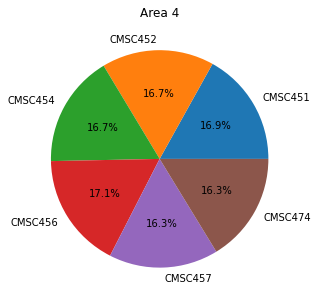

In [23]:
# AREA 4
NaNs_451 = df['CMSC451'].isna().sum()
NaNs_452 = df['CMSC452'].isna().sum()
NaNs_454 = df['CMSC454'].isna().sum()
NaNs_456 = df['CMSC456'].isna().sum()
NaNs_457 = df['CMSC457'].isna().sum()
NaNs_474 = df['CMSC474'].isna().sum()
CMSC451_num = 165 - NaNs_451
CMSC452_num = 165 - NaNs_452
CMSC454_num = 165 - NaNs_454
CMSC456_num = 165 - NaNs_456
CMSC457_num = 165 - NaNs_457
CMSC474_num = 165 - NaNs_474
data = [CMSC451_num, CMSC452_num, CMSC454_num, CMSC456_num, CMSC457_num, CMSC474_num]
labels = 'CMSC451', 'CMSC452', 'CMSC454', 'CMSC456', 'CMSC457', 'CMSC474'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 4")
plt.show()

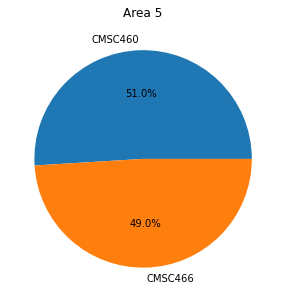

In [24]:
# AREA 5
NaNs_460 = df['CMSC460'].isna().sum()
NaNs_466 = df['CMSC466'].isna().sum()
CMSC460_num = 165 - NaNs_460
CMSC466_num = 165 - NaNs_466
data = [CMSC460_num, CMSC466_num]
labels = 'CMSC460', 'CMSC466'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Area 5")
plt.show()

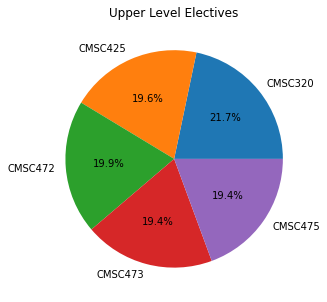

In [25]:
# UPPER LEVEL ELECTIVES
NaNs_320 = df['CMSC320'].isna().sum()
NaNs_425 = df['CMSC425'].isna().sum()
NaNs_472 = df['CMSC472'].isna().sum()
NaNs_473 = df['CMSC473'].isna().sum()
NaNs_475 = df['CMSC475'].isna().sum()
CMSC320_num = 165 - NaNs_320
CMSC425_num = 165 - NaNs_425
CMSC472_num = 165 - NaNs_472
CMSC473_num = 165 - NaNs_473
CMSC475_num = 165 - NaNs_475
data = [CMSC420_num, CMSC425_num, CMSC472_num, CMSC473_num, CMSC475_num]
labels = 'CMSC320', 'CMSC425', 'CMSC472','CMSC473', 'CMSC475'
plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title("Upper Level Electives")
plt.show()

## Data Pre-Processing

In [ ]:
df = df.replace("Don't want to share", "Not Attempted")

In [ ]:
def replace_not_attempted(df, grade):
    return df.replace('Not Attempted', grade)

In [ ]:
df2 = df[["Users", "CMSC131", "CMSC132", "CMSC216", "CMSC250"]]

In [ ]:
df_cs_A = replace_not_attempted(df2, 'A')
df_cs_B = replace_not_attempted(df2, 'B')

In [ ]:
df3 = df[["Users", "MATH140", "MATH141", "STAT400"]]

In [ ]:
df_math_A = replace_not_attempted(df3, 'A')
df_math_B = replace_not_attempted(df3, 'B')

In [ ]:
df_upper = df[["Users", "CMSC330", "CMSC351", "CMSC411", "CMSC412", "CMSC414", "CMSC416", "CMSC417", "CMSC420", "CMSC421",
              "CMSC422", "CMSC423", "CMSC424", "CMSC426", "CMSC427", "CMSC470", "CMSC430", "CMSC433", "CMSC434", "CMSC435", "CMSC436", 
              "CMSC451", "CMSC452", "CMSC454", "CMSC456", "CMSC457", "CMSC460", "CMSC466", "CMSC320", "CMSC425", "CMSC472", 
              "CMSC473", "CMSC474", "CMSC475"]]

In [ ]:
df_upper = df_upper.replace("Not Attempted", np.nan)

In [ ]:
def merger(df, df_cs, df_math, df_upper):
    df = df[["Users", "CS_Track", "CMSC4XX", "Graduated"]]
    df_temp = df.merge(df_math, on = "Users")
    df_temp = df_temp.merge(df_cs, on = "Users")
    return df_temp.merge(df_upper, on = "Users")

def plus_minus_clean(df):
    df_temp = df.replace(["A-", "A+"], "A")
    df_temp = df_temp.replace(["B-", "B+"], "B")
    df_temp = df_temp.replace(["C-", "C+"], "C")
    df_temp = df_temp.replace(["D-", "D+"], "D")
    return df_temp

def encoding_help(df):
    df_temp = df.replace("A", 4)
    df_temp = df_temp.replace("B", 3)
    df_temp = df_temp.replace("C", 2)
    df_temp = df_temp.replace("D", 1)
    df_temp = df_temp.replace([np.nan, "F"], 0)
    return df_temp

In [ ]:
df4 = merger(df, df_cs_A, df_math_A, df_upper)
df5 = plus_minus_clean(df4)
df6 = encoding_help(df5)

In [ ]:
df_m24x = df[["MATH240", "MATH241"]]
df_m24x["MATH24x"] = np.nan
df_m24x = df_m24x.replace("Not Attempted", np.nan)
df_m24x = encoding_help(plus_minus_clean(df_m24x))

In [ ]:
for i in range(df_m24x.shape[0]):
    if(df_m24x.iat[i, 0] > df_m24x.iat[i, 1]):
        df_m24x.iat[i, 2] = df_m24x.iat[i, 0]
    elif(df_m24x.iat[i, 0] < df_m24x.iat[i, 1]):
        df_m24x.iat[i, 2] = df_m24x.iat[i, 1]
    elif(df_m24x.iat[i, 0] == 0):
        df_m24x.iat[i, 2] = df6.iloc[i, 4:6].mean() - 1
    elif(df_m24x.iat[i, 0] == df_m24x.iat[i, 1]):
        df_m24x.iat[i, 2] = df_m24x.iat[i, 0]

In [ ]:
df_m24x["MATH24x"] = df_m24x["MATH24x"].astype(int)

In [ ]:
df6.insert(6, "MATH24x", df_m24x["MATH24x"])

In [ ]:
df6.head()

In [ ]:
df6.to_csv('clean.csv')

In [ ]:
df_ul = df6[["Users", "CMSC4XX", "CMSC330", "CMSC351", "CMSC411", "CMSC412", "CMSC414", "CMSC416", "CMSC417", "CMSC420", "CMSC421",
              "CMSC422", "CMSC423", "CMSC424", "CMSC426", "CMSC427", "CMSC470", "CMSC430", "CMSC433", "CMSC434", "CMSC435", "CMSC436", 
              "CMSC451", "CMSC452", "CMSC454", "CMSC456", "CMSC457", "CMSC460", "CMSC466", "CMSC320", "CMSC425", "CMSC472", "CMSC473", "CMSC474", "CMSC475"]]

df_ul.head()

In [ ]:
df_ul.to_csv('upper_level.csv')